In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [23]:
#reproducibility
np.random.seed(1234)

dep_rows = 3200
rand_rows = 12000

In [25]:
deptweets_raw = "depressive_tweets_processed.csv"
randtweets_raw = "Sentiment Analysis Dataset 2.csv"
vectors_file = "GoogleNews-vectors-negative300.bin.gz"

In [27]:
deptweets = pd.read_csv(deptweets_raw, sep = '|', header = None, usecols = range(0,9), nrows = dep_rows)
randtweets = pd.read_csv(randtweets_raw, encoding = "ISO-8859-1", usecols = range(0,4), nrows = rand_rows)
deptweets.head()


,0,1,2,3,4,5,6,7,8
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1,0,0
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,0,0,0


In [29]:
randtweets.head()

,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [31]:
!pip install gensim

In [33]:
from gensim.models import KeyedVectors
w_vector = KeyedVectors.load_word2vec_format(vectors_file, binary=True)

In [35]:
import re
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


word = re.compile('(%s)' % '|'.join(contractions.keys()))

def fixContractions(text, word=word):
    def replace(match):
        return contractions[match.group(0)]
    return word.sub(replace, text)

In [37]:
#!pip install nltk
#!pip install ftfy

In [39]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords as sw
from nltk import PorterStemmer as PS
import ftfy


def preprocess(entries):
    processed = []
    for entry in entries:
        entry = str(entry)
        if re.match("(\w+:\/\/\S+)", entry) == None and len(entry) > 10:
            #removes any hashtag, @mention, emoji and image URLs
            entry = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", entry).split())
            
            #fixes any abnormal encoded texts
            entry = ftfy.fix_text(entry)
            
            #fixes any contraction
            entry = fixContractions(entry)

            #removes any punctuation
            entry = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", entry).split())

            #stop words
            swords = set(sw.words('english'))
            tokens = nltk.word_tokenize(entry) 
            filtered_entry = [w for w in tokens if not w in swords]
            entry = ' '.join(filtered_entry)

            #stem words
            entry = PS().stem(entry)
            
            processed.append(entry)

    return processed


In [41]:
#!pip install keras
#!pip install tensorflow

In [43]:
from keras.preprocessing.text import Tokenizer

In [45]:
dt_arr = [x for x in deptweets[5]]
rt_arr = [x for x in randtweets['SentimentText']]
dX = preprocess(dt_arr)
rX = preprocess(rt_arr)
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(dX + rX)
d_seq = tokenizer.texts_to_sequences(dX)
r_seq = tokenizer.texts_to_sequences(rX)

w_index = tokenizer.word_index
print('Found %s unique tokens' % len(w_index))

Found 21548 unique tokens


In [47]:
from keras.preprocessing.sequence import pad_sequences
d = pad_sequences(d_seq, maxlen=280)
r = pad_sequences(r_seq, maxlen=280)
print('Shape of data_d tensor:', d.shape)
print('Shape of data_r tensor:', r.shape)

Shape of data_d tensor: (2308, 280)
Shape of data_r tensor: (11911, 280)


In [49]:
nb_words = min(20000, len(w_index))

embed_mat = np.zeros((nb_words, 300))

for (word, i) in w_index.items():
    if word in w_vector.vocab and i < 20000:
        embed_mat[i] = w_vector.word_vec(word)

In [51]:
# Assigning labels for deptweets and randtweets
d_lab= np.array([1] * dep_rows)
r_lab = np.array([0] * rand_rows)

In [52]:
#Splitting the arrays into test (20%), validation (20%), and train data (60%)
perm = np.random.permutation(len(d))
dtrain_indices = perm[:int(len(d)*(0.6))]
dtest_indices = perm[int(len(d)*(0.6)):int(len(d)*(0.8))]
dval_indices = perm[int(len(d)*(0.8)):]

perm = np.random.permutation(len(r))
rtrain_indices = perm[:int(len(r)*(0.6))]
rtest_indices= perm[int(len(r)*(0.6)):int(len(r)*(0.8))]
rval_indices = perm[int(len(r)*(0.8)):]

In [53]:
#Combining arrays
X_train = np.concatenate((d[dtrain_indices], r[rtrain_indices]))
Xl_train = np.concatenate((d_lab[dtrain_indices], r_lab[rtrain_indices]))
X_test = np.concatenate((d[dtest_indices], r[rtest_indices]))
Xl_test = np.concatenate((d_lab[dtest_indices], r_lab[rtest_indices]))
X_val = np.concatenate((d[dval_indices], r[rval_indices]))
Xl_val = np.concatenate((d_lab[dval_indices], r_lab[rval_indices]))

#Randomizing the data entries
perm_train = np.random.permutation(len(X_train))
X_train = X_train[perm_train]
Xl_train = Xl_train[perm_train]
perm_test = np.random.permutation(len(X_test))
X_test = X_test[perm_test]
Xl_test = Xl_test[perm_test]
perm_val = np.random.permutation(len(X_val))
X_val = X_val[perm_val]
Xl_val = Xl_val[perm_val]

In [54]:
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D

In [55]:
model = Sequential()
# Embedded layer
model.add(Embedding(len(embed_mat), 300, weights=[embed_mat], input_length=280, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
# LSTM Layer
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 300)          6000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 280, 32)           28832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 140, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 140, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(X_train, Xl_train,validation_data=(X_val, Xl_val),epochs=10, batch_size=40, shuffle=True, callbacks=[early_stop])

Epoch 1/10
214/214 [==============================] - 78s 363ms/step - loss: 0.1528 - acc: 0.9511 - val_loss: 0.0364 - val_acc: 0.9909
Epoch 2/10
214/214 [==============================] - 78s 366ms/step - loss: 0.0375 - acc: 0.9911 - val_loss: 0.0398 - val_acc: 0.9898
Epoch 3/10
214/214 [==============================] - 78s 364ms/step - loss: 0.0301 - acc: 0.9927 - val_loss: 0.0321 - val_acc: 0.9919
Epoch 4/10
214/214 [==============================] - 77s 361ms/step - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0364 - val_acc: 0.9905
Epoch 5/10
214/214 [==============================] - 307s 1s/step - loss: 0.0241 - acc: 0.9939 - val_loss: 0.0338 - val_acc: 0.9916
Epoch 6/10
214/214 [==============================] - 76s 354ms/step - loss: 0.0182 - acc: 0.9953 - val_loss: 0.0378 - val_acc: 0.9912


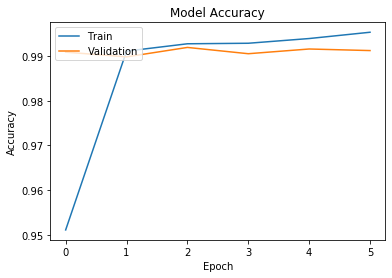

In [40]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

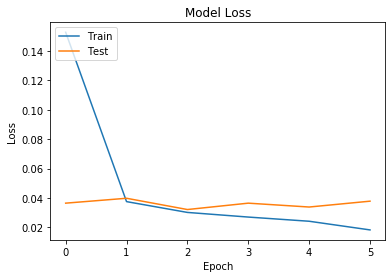

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
lpred = model.predict(X_test)
lpred = np.round(lpred.flatten())
accuracy = accuracy_score(Xl_test, lpred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 99.19%


In [46]:
print(classification_report(Xl_test, lpred))
cm = confusion_matrix(Xl_test, lpred)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2382
           1       0.99      0.96      0.97       462

    accuracy                           0.99      2844
   macro avg       0.99      0.98      0.98      2844
weighted avg       0.99      0.99      0.99      2844



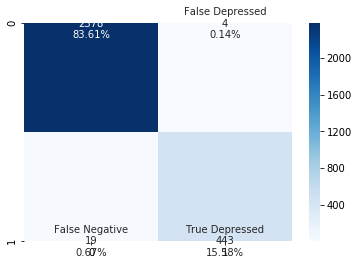

In [48]:
import seaborn as sns
group_names = ["True Negative","False Depressed","False Negative","True Depressed"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten() ] 
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [50]:
model.save("depression-binary.h5")